In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import  train_test_split


In [2]:
df = pd.read_csv("h1b_cleaned_encoded.csv")

C:\Users\thakk\AppData\Local\Temp\ipykernel_19916\4239751877.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("h1b_cleaned_encoded.csv")


In [3]:
df

,REFILE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,...,COUNTRY_OF_CITIZENSHIP_UNITED ARAB EMIRATES,COUNTRY_OF_CITIZENSHIP_UNITED KINGDOM,COUNTRY_OF_CITIZENSHIP_UNITED STATES OF AMERICA,COUNTRY_OF_CITIZENSHIP_URUGUAY,COUNTRY_OF_CITIZENSHIP_UZBEKISTAN,COUNTRY_OF_CITIZENSHIP_VENEZUELA,COUNTRY_OF_CITIZENSHIP_VIETNAM,COUNTRY_OF_CITIZENSHIP_YEMEN,COUNTRY_OF_CITIZENSHIP_ZAMBIA,COUNTRY_OF_CITIZENSHIP_ZIMBABWE
0,0,55.0,316210,4,0,4,0.0,1,36.0,THAILAND,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.0,54199,3,0,4,0.0,0,0.0,ISRAEL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,55.0,511210,4,0,3,0.0,1,36.0,CANADA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,22.0,115210,4,0,4,0.0,1,60.0,UNITED KINGDOM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,21.0,312111,3,0,2,0.0,1,36.0,CHINA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90359,0,6.0,621310,2,0,1,0.0,0,0.0,SOUTH KOREA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90360,0,86.0,622110,3,0,1,0.0,0,0.0,PHILIPPINES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90361,0,25.0,621111,3,0,1,0.0,0,0.0,PHILIPPINES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90362,0,13.0,51119,1,0,0,0.0,0,0.0,JAPAN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df.drop(columns=['COUNTRY_OF_CITIZENSHIP'])

def clean_naics(row):

    naics = str(row['NAICS_CODE'])
    new_naics = []
    for char in naics:
        if char == '-':
            pass
        else:
            new_naics.append(char)
    return ''.join(new_naics)



df['NAICS_CODE'] = df.apply(clean_naics,axis=1)

In [7]:
df['target'].value_counts()

target
1    88232
0     2132
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTENC

In [19]:
df

,REFILE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,FOREIGN_WORKER_CURR_EMPLOYED,...,COUNTRY_OF_CITIZENSHIP_UNITED ARAB EMIRATES,COUNTRY_OF_CITIZENSHIP_UNITED KINGDOM,COUNTRY_OF_CITIZENSHIP_UNITED STATES OF AMERICA,COUNTRY_OF_CITIZENSHIP_URUGUAY,COUNTRY_OF_CITIZENSHIP_UZBEKISTAN,COUNTRY_OF_CITIZENSHIP_VENEZUELA,COUNTRY_OF_CITIZENSHIP_VIETNAM,COUNTRY_OF_CITIZENSHIP_YEMEN,COUNTRY_OF_CITIZENSHIP_ZAMBIA,COUNTRY_OF_CITIZENSHIP_ZIMBABWE
0,0,55.0,316210,4,0,4,0.0,1,36.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.0,54199,3,0,4,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,55.0,511210,4,0,3,0.0,1,36.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,22.0,115210,4,0,4,0.0,1,60.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,21.0,312111,3,0,2,0.0,1,36.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90359,0,6.0,621310,2,0,1,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90360,0,86.0,622110,3,0,1,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90361,0,25.0,621111,3,0,1,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90362,0,13.0,51119,1,0,0,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df['target']

0        1
1        0
2        1
3        1
4        1
        ..
90359    1
90360    0
90361    1
90362    1
90363    1
Name: target, Length: 90364, dtype: int64

In [22]:
X = df.drop('target',axis=1)
y = df['target']

In [25]:
sm = SMOTENC(random_state=101,categorical_features=[2])

In [27]:
X_smote , y_smote = sm.fit_resample(X,y)

In [30]:
y_smote.value_counts()

target
1    88232
0    88232
Name: count, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3,random_state=101)

In [34]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
preds = rfc.predict(X_test)

In [36]:
report = classification_report(preds,y_test)

In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26614
           1       0.97      0.97      0.97     26326

    accuracy                           0.97     52940
   macro avg       0.97      0.97      0.97     52940
weighted avg       0.97      0.97      0.97     52940



In [38]:
print("Accuracy : " + str(accuracy_score(preds,y_test)*100) + '%')

Accuracy : 96.9928220627125%


In [39]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

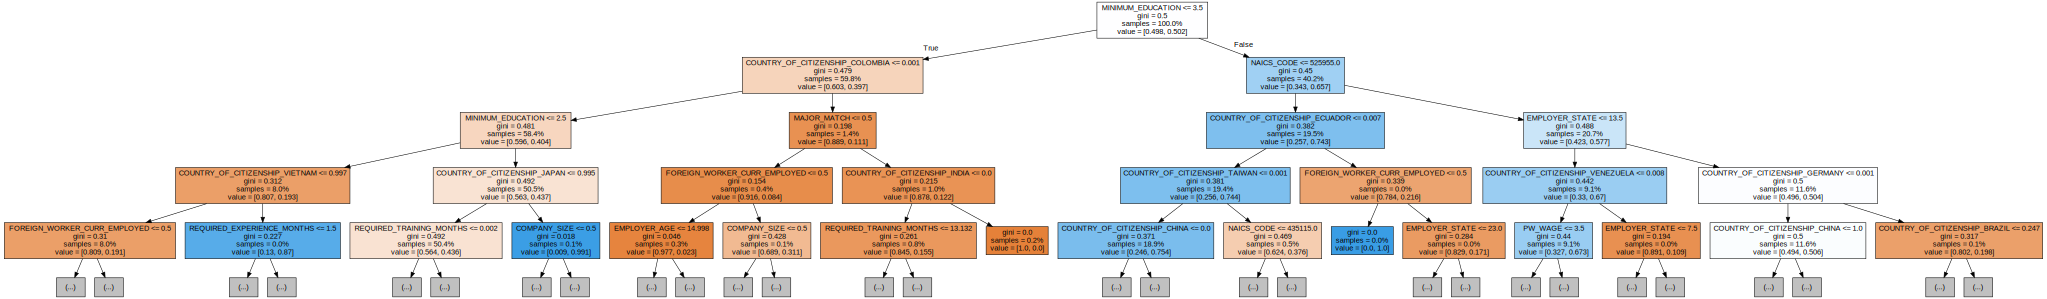

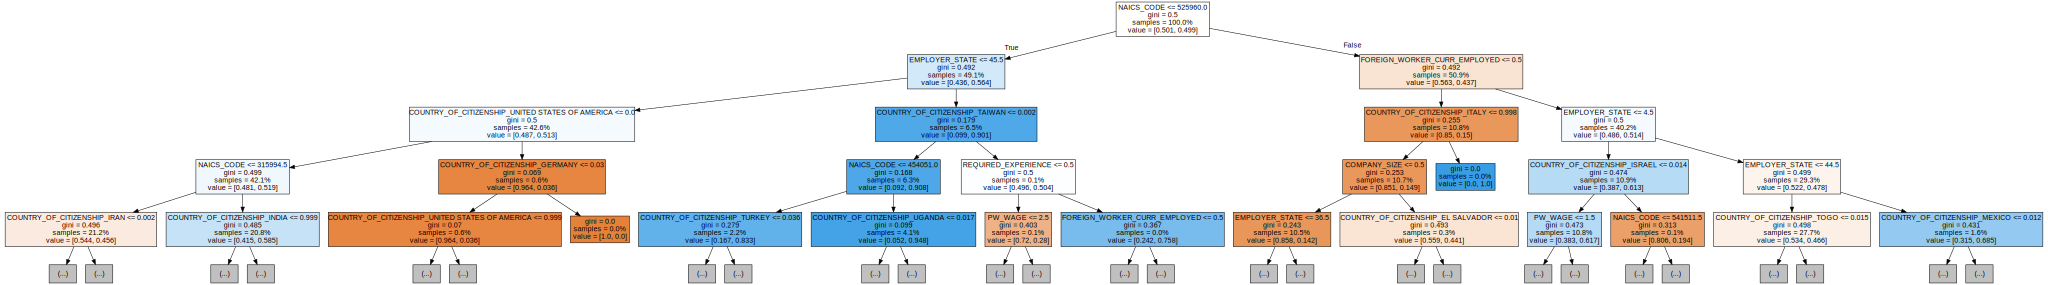

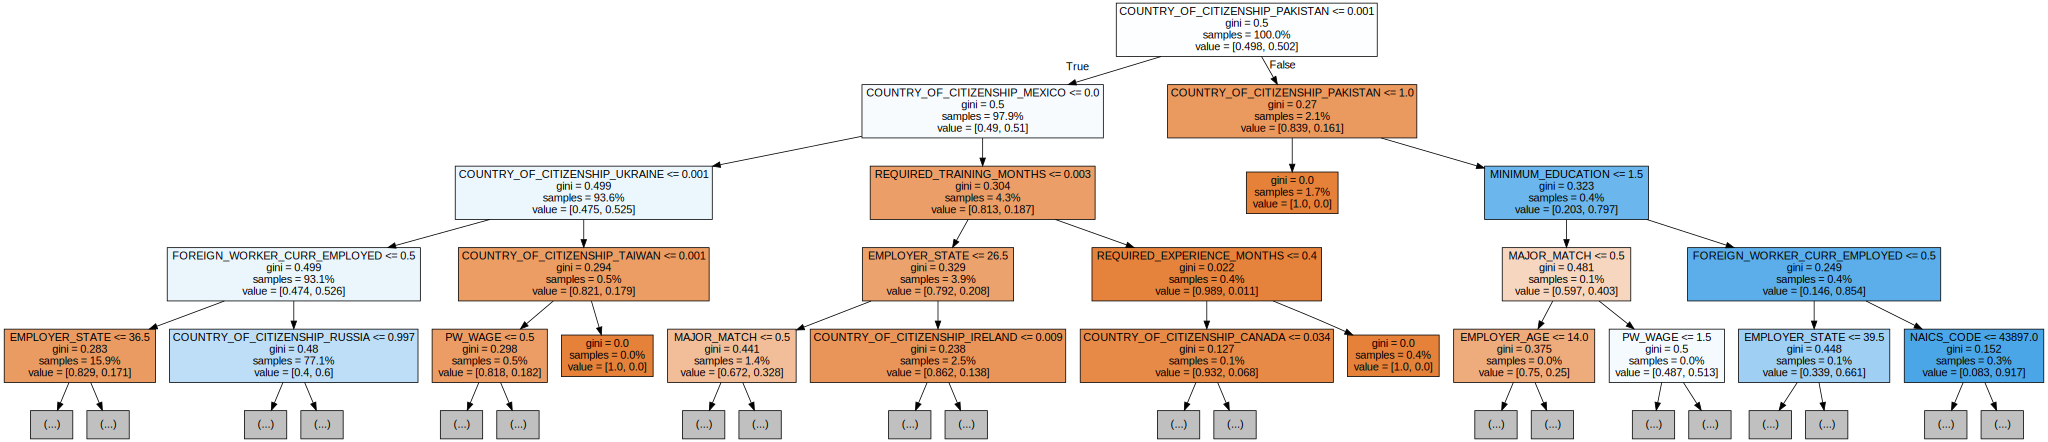

In [40]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=4, 
                               impurity=True, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)